# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url + city)
        city_weather_json = city_weather.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fairbanks
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | turkmenabat
Processing Record 4 of Set 1 | mpulungu
Processing Record 5 of Set 1 | mutis
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | karakose
City not found. Skipping...
Processing Record 8 of Set 1 | lokosovo
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | manyana
Processing Record 20 of Set 1 | zyryanka
Processing Record 21 of Set 1 | khonuu
City not found. Skippin

Processing Record 38 of Set 4 | port-de-paix
City not found. Skipping...
Processing Record 39 of Set 4 | peniche
Processing Record 40 of Set 4 | novomoskovsk
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | akhtanizovskaya
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | sabha
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | andros town
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | akureyri
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | puerto escondido
Processing Record 3 of Set 5 | qui nhon
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | perth
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | boyolangu
Processing Record 9 of Set 5 | berlevag
Processing Record 10 of Set 5 | bratsk
Processing Record

Processing Record 23 of Set 8 | les cayes
Processing Record 24 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 25 of Set 8 | toamasina
Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | southbridge
Processing Record 28 of Set 8 | nordhausen
Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | paamiut
Processing Record 31 of Set 8 | ritchie
Processing Record 32 of Set 8 | los llanos de aridane
Processing Record 33 of Set 8 | ciras
City not found. Skipping...
Processing Record 34 of Set 8 | ikeda
Processing Record 35 of Set 8 | san cristobal
Processing Record 36 of Set 8 | kudahuvadhoo
Processing Record 37 of Set 8 | tarcal
Processing Record 38 of Set 8 | chapleau
Processing Record 39 of Set 8 | daru
Processing Record 40 of Set 8 | drabiv
Processing Record 41 of Set 8 | layou
Processing Record 42 of Set 8 | rochegda
Processing Record 43 of Set 8 | ilo
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 4

Processing Record 11 of Set 12 | moose factory
Processing Record 12 of Set 12 | shubarshi
Processing Record 13 of Set 12 | katherine
Processing Record 14 of Set 12 | loudi
Processing Record 15 of Set 12 | bolgatanga
Processing Record 16 of Set 12 | shadegan
Processing Record 17 of Set 12 | haibowan
City not found. Skipping...
Processing Record 18 of Set 12 | nelson bay
Processing Record 19 of Set 12 | ibia
Processing Record 20 of Set 12 | pucallpa
Processing Record 21 of Set 12 | augustenborg
Processing Record 22 of Set 12 | san bartolome de tirajana
Processing Record 23 of Set 12 | aksarka
Processing Record 24 of Set 12 | rocha
Processing Record 25 of Set 12 | fort saint james
Processing Record 26 of Set 12 | filingue
Processing Record 27 of Set 12 | nyurba
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          525
Lat           525
Lng           525
Max Temp      525
Humidity      525
Cloudiness    525
Wind Speed    525
Country       525
Date          525
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fairbanks,64.8378,-147.7164,261.94,82,100,2.57,US,1675308557
1,mataura,-46.1927,168.8643,295.19,76,100,1.91,NZ,1675308557
2,turkmenabat,39.0733,63.5786,279.14,100,99,3.09,TM,1675308558
3,mpulungu,-8.7623,31.1141,293.59,80,41,1.66,ZM,1675308559
4,mutis,6.2262,-77.4044,298.50,83,56,0.62,CO,1675308559


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fairbanks,64.8378,-147.7164,261.94,82,100,2.57,US,1675308557
1,mataura,-46.1927,168.8643,295.19,76,100,1.91,NZ,1675308557
2,turkmenabat,39.0733,63.5786,279.14,100,99,3.09,TM,1675308558
3,mpulungu,-8.7623,31.1141,293.59,80,41,1.66,ZM,1675308559
4,mutis,6.2262,-77.4044,298.50,83,56,0.62,CO,1675308559


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

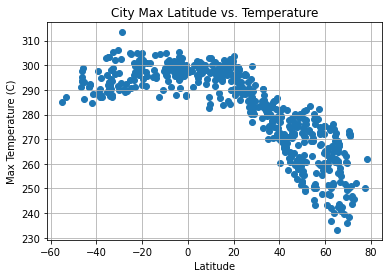

In [10]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

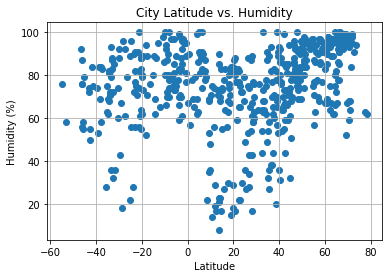

In [11]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

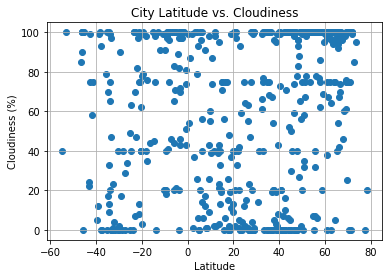

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

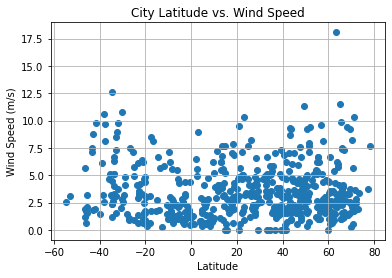

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
x_values = 
y_values =
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


NameError: name 'x_values' is not defined

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fairbanks,64.8378,-147.7164,261.94,82,100,2.57,US,1675308557
2,turkmenabat,39.0733,63.5786,279.14,100,99,3.09,TM,1675308558
4,mutis,6.2262,-77.4044,298.50,83,56,0.62,CO,1675308559
5,lokosovo,61.1333,74.8167,259.73,98,99,2.46,RU,1675308560
7,jamestown,42.0970,-79.2353,266.32,85,0,3.60,US,1675308470


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lng'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fairbanks,64.8378,-147.7164,261.94,82,100,2.57,US,1675308557
4,mutis,6.2262,-77.4044,298.50,83,56,0.62,CO,1675308559
7,jamestown,42.0970,-79.2353,266.32,85,0,3.60,US,1675308470
10,punta arenas,-53.1500,-70.9167,287.21,58,100,3.09,CL,1675308338
13,kodiak,57.7900,-152.4072,272.88,86,75,2.06,US,1675308563


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8627720976200626


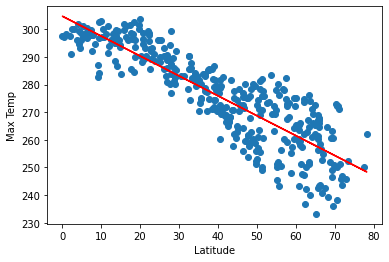

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.7586806966662614


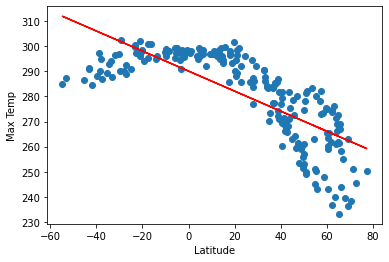

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear regression of both the northern and southern hemisphere is showing a strong negative relationship between the location of a city and it's max temperature. Visually it can be determined that this relationship is stronger in the northern hemisphere than in the southern.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.44237898186144586


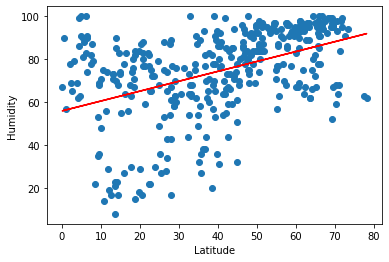

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.0054373551463537395


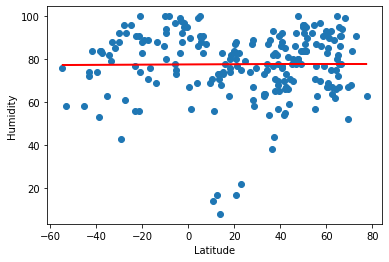

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear regression shows that there is a moderate positive relationship between latitude and humidity in the northern hemisphere. The r-value of the southern hemisphere shows no linear relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34544531124644084


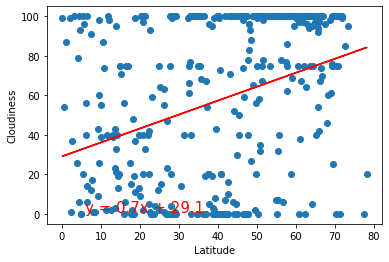

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.15871062099754624


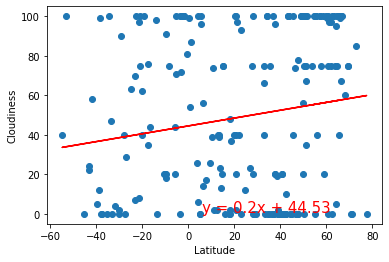

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear regression of cloudiness versus latitude in the northern hemisphere show a weak positive relationship. The southern hemisphere shows no linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08911842344596624


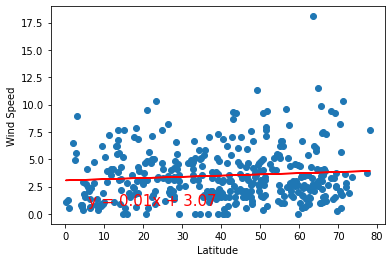

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.09596510281701627


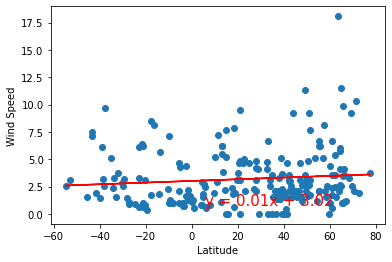

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The linear regression of latitude versus windspeed show no linear relationship as determined by the r values being near 0.